# Deep-Map
## Deep learning-enhanced morphodynamic profiling and cell fate prediction

This is an unofficial implementation of Deep-Map as described by Ren et al., 2021, bioRxiv.
The following example shows how to use the package.
We use morphological features of cardiomyocytes that have been treated with
different hypertrophy-inducing drugs (Ins: insulin, PE: phenylephrine, ANP: atrial natriuretic peptide) and
imaged every hour during a 48h-interval with a live-cell microscope.
The usage was designed to be similar to other ML packages like scikit-learn.

In [1]:
# import DeepMap class
from deepmap import DeepMap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%load_ext autoreload
%autoreload 2

In [2]:
# load example data
x_path = "../data/hypertrophy.npy"
y_path = "../data/labels.npy"
X = np.load(x_path, allow_pickle=True)
y = np.load(y_path, allow_pickle=True)
label_dict = {'ANP': 0, 'Ins': 1, 'PE': 2}

In [3]:
# encode labels in y
y_enc = np.array([label_dict[val] for val in y], dtype=int)

DeepMap splits the data internally into training, validation and testing sets.
The predicted embedding is returned only for the testing set.

In [4]:
# initialize DeepMap and fit model on train data
dm = DeepMap(n_epochs=20, num_workers=0)
dm.fit(X, y_enc)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type       | Params
---------------------------------------
0 | encode  | Sequential | 15.5 K
1 | cluster | Sequential | 6     
---------------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params
0.062     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

C:\Users\amarx\Anaconda3\envs\deep-map\lib\site-packages\pytorch_lightning\trainer\data_loading.py:111: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\amarx\Anaconda3\envs\deep-map\lib\site-packages\pytorch_lightning\trainer\data_loading.py:111: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [5]:
# predict embedding on test data
Z, ix = dm.predict(return_ix=True)

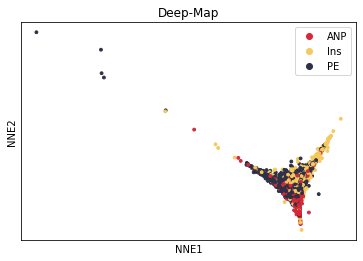

In [6]:
colors = ListedColormap(['#D62839', '#F4C95D', '#2D3047'])
size = 50000 / X.shape[0]

fig, ax = plt.subplots()
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y_enc[ix], cmap=colors, s=size)
ax.legend(handles=scatter.legend_elements()[0], labels=label_dict.keys())
ax.set_title('Deep-Map')
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel('NNE1')
ax.set_ylabel('NNE2')
ax.autoscale_view()

Note that removing outliers could change the result and might be of interest before
using Deep-Map.

